## Predict H1N1 and Seasonal Flu Vaccines
- predict prob for 2 flu vaccines
- model: binary classification/labeled supervised learning
- dataset: https://www.drivendata.org/competitions/66/flu-shot-learning/data/

### 1. Read Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [21]:
train_X=pd.read_csv("training_set_features.csv")
train_y=pd.read_csv("training_set_labels.csv")
train_df=pd.merge(train_X,train_y,on="respondent_id")
train_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [22]:
train_df.shape

(26707, 38)

In [23]:
train_df.isna().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [24]:
del_col=['employment_occupation','employment_industry','health_insurance']
train_df.drop(del_col,axis=1,inplace=True)
train_df=train_df.dropna()
train_df.isna().sum().sort_values(ascending=False)

seasonal_vaccine               0
behavioral_outside_home        0
health_worker                  0
child_under_6_months           0
chronic_med_condition          0
doctor_recc_seasonal           0
doctor_recc_h1n1               0
behavioral_touch_face          0
behavioral_large_gatherings    0
opinion_h1n1_risk              0
behavioral_wash_hands          0
behavioral_face_mask           0
behavioral_avoidance           0
behavioral_antiviral_meds      0
h1n1_knowledge                 0
h1n1_concern                   0
opinion_h1n1_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
h1n1_vaccine                   0
marital_status                 0
household_children             0
household_adults               0
census_msa                     0
hhs_geo_region                 0
employment_status              0
rent_or_own                    0
income_poverty                 0
opinion_seas_vacc_effective    0
sex                            0
race                           0
education 

### 2. Data Exploration

In [26]:
train_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,...,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,13342.924804,1.615518,1.302566,0.049435,0.740454,0.067712,0.834895,0.353274,0.330058,0.685012,...,3.922258,2.359892,2.347622,4.060483,2.757102,2.104979,0.903218,0.551064,0.229814,0.477955
std,7722.791039,0.888246,0.596258,0.216780,0.438397,0.251258,0.371285,0.477999,0.470246,0.464523,...,0.982311,1.291151,1.353140,1.062052,1.387503,1.325909,0.746290,0.938224,0.420724,0.499527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6668.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13320.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20048.750000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


#### Take away:
- comparing to 75%, max for `total_rooms`, `population`, `households` need a further check.
- abnormal data for target col `median_house_value`.

In [97]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.loc[:,df.columns!='ocean_proximity']) 
scaled_df=pd.DataFrame(scaled_df,columns=df.columns.values[0:-1])
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.304883,0.979618,1.812895,-0.581462,-1.176249,-1.202281,-1.189649,2.533741,1.723464
1,-1.309868,0.979618,1.812895,-0.778082,-0.946837,-1.083693,-0.959439,1.420463,1.610331
2,-1.309868,0.979618,1.812895,-0.418462,-0.717426,-1.070304,-0.740191,0.181256,1.619758
3,-1.309868,0.979618,1.812895,-1.139739,-1.058994,-1.361037,-1.101950,0.312701,0.860301
4,-1.309868,0.975021,1.812895,0.506566,0.348063,-0.058477,0.657516,0.052225,1.169321


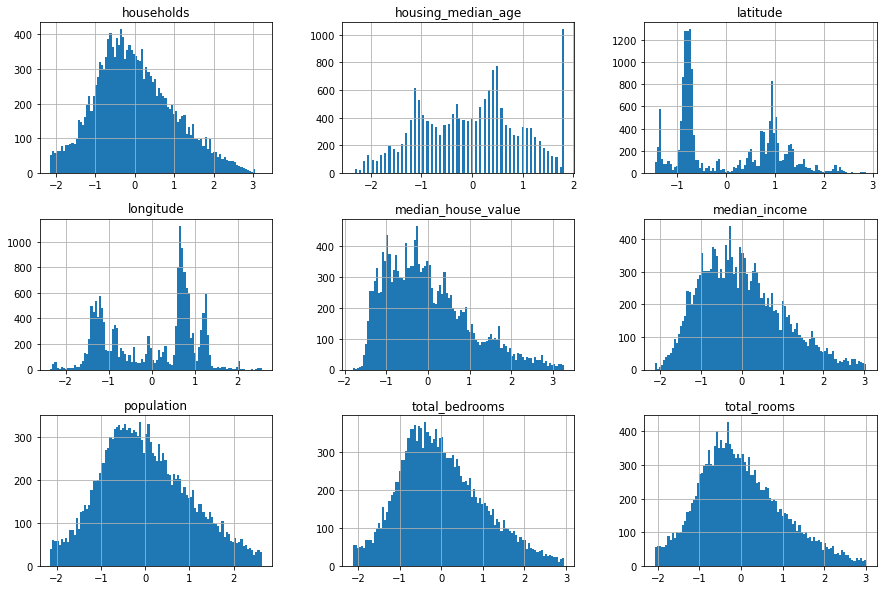

In [98]:
scaled_df.hist(bins=100,figsize=(15,10))
plt.show()

### 3. Feature Engineering

In [99]:
# binary classification, if over threshold, label as 1, otherwise, label as 0.
threshold= 1.0 
scaled_df["median_house_value_is_high"] = (scaled_df["median_house_value"] > threshold).astype(float)

In [104]:
feature_columns = []

In [105]:
#location
resolution_in_degrees = 0.4 

latitude_num = tf.feature_column.numeric_column("latitude")
latitude_bins = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_num, latitude_bins)

longitude_num = tf.feature_column.numeric_column("longitude")
longitude_bins = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_num, longitude_bins)

lat_x_lon = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_location = tf.feature_column.indicator_column(lat_x_lon)
feature_columns.append(crossed_location)

In [106]:
#demographic
med_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(med_income)

population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

households = tf.feature_column.numeric_column("households")
feature_columns.append(households)

In [107]:
#house
house_age=tf.feature_column.numeric_column("housing_median_age")
feature_columns.append(house_age)

ttl_room=tf.feature_column.numeric_column("total_rooms")
feature_columns.append(ttl_room)

ttl_bedroom=tf.feature_column.numeric_column("total_bedrooms")
feature_columns.append(ttl_bedroom)

In [108]:
feature_layer = layers.DenseFeatures(feature_columns)

### Train/Test Split

In [109]:
from sklearn.model_selection import train_test_split
train_df, test_df= train_test_split(scaled_df,test_size=0.22, random_state=123)
print("Total df size: %i\n train_df size: %i \n test_df size: %i"\
%(df.shape[0],train_df.shape[0],test_df.shape[0]))

Total df size: 16573
 train_df size: 12926 
 test_df size: 3647


### 4. Modeling

### 4.1 Define functions that build and train a model
- build_model(learning_rate), which builds a randomly-initialized model.
- train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.

In [110]:
#Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics): #add one more var
  model = tf.keras.models.Sequential()

  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(), #binaryloss vs rmse
                metrics=my_metrics) #my_metrics
  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
    
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history) #hist vs rmse

  return epochs, hist  

### 4.2 Define plotting functions
- a loss curve

In [111]:
#Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

### 4.3 Call the model functions

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
130/130 [==============================] - 1s 2ms/step - loss: 0.6739 - accuracy: 0.1582 - precision: 0.1574 - recall: 1.0000
Epoch 2/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.2489 - precision: 0.1760 - recall: 0.9962
Epoch 3/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.5467 - precision: 0.2628 - recall: 0.9650
Epoch 4/20
130/130 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7210 - precision: 0.3665 - recall: 0.8971
Epoch 5/20
130/130 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.7935 - precision: 0.4226 - recall: 0.8407
Epoch 6/20
130/130 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8323 - precision: 0.4878 - recall: 0.7720
Epoch 7/20
130/130 [==============================] - 0s 2ms/step - 

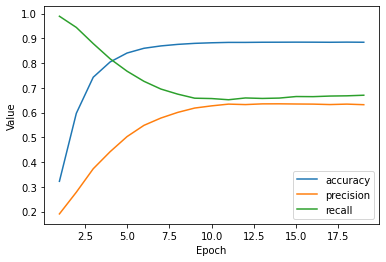

In [112]:
# Hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"
threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=threshold),
           tf.keras.metrics.Precision(name='precision',thresholds=threshold),
           tf.keras.metrics.Recall(name='recall',thresholds=threshold),
           #tf.keras.metrics.AUC(name='auc',thresholds=threshold)
          ]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_df, epochs, 
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy','precision','recall'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
130/130 [==============================] - 1s 2ms/step - loss: 0.6727 - accuracy: 0.6442 - precision: 0.2587 - recall: 0.6421
Epoch 2/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.8390 - precision: 0.4992 - recall: 0.5585
Epoch 3/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.8724 - precision: 0.6508 - recall: 0.4428
Epoch 4/20
130/130 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8759 - precision: 0.7216 - recall: 0.4045
Epoch 5/20
130/130 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8795 - precision: 0.7623 - recall: 0.3619
Epoch 6/20
130/130 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8790 - precision: 0.7833 - recall: 0.3549
Epoch 7/20
130/130 [==============================] - 0s 2ms/step - 

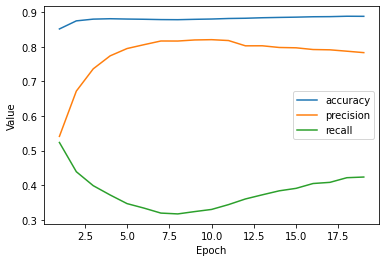

In [113]:
# change thresholds
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"
threshold = 0.52

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=threshold),
           tf.keras.metrics.Precision(name='precision',thresholds=threshold),
           tf.keras.metrics.Recall(name='recall',thresholds=threshold),
           #tf.keras.metrics.AUC(name='auc',thresholds=threshold)
          ]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_df, epochs, 
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy','precision','recall'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

- A `threshold` of slightly over 0.5 appears to produce the highest accuracy (about 83%). 
- Raising the `threshold` to 0.9 drops accuracy by about 5%.
- Lowering the `threshold` to 0.3 drops accuracy by about 3%. 

In [114]:
print("\n: Evaluate the new model on the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)
#87%


: Evaluate the new model on the test set:
Consider rewriting this model with the Functional API.
37/37 [==============================] - 1s 3ms/step - loss: 0.2606 - accuracy: 0.8958 - precision: 0.8144 - recall: 0.4210


[0.26059603691101074,
 0.895804762840271,
 0.8144329786300659,
 0.42095914483070374]

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
130/130 [==============================] - 1s 2ms/step - loss: 0.6396 - auc: 0.7819
Epoch 2/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5503 - auc: 0.8749
Epoch 3/20
130/130 [==============================] - 0s 2ms/step - loss: 0.4831 - auc: 0.8837
Epoch 4/20
130/130 [==============================] - 0s 4ms/step - loss: 0.4305 - auc: 0.8910
Epoch 5/20
130/130 [==============================] - 0s 3ms/step - loss: 0.3927 - auc: 0.8866
Epoch 6/20
130/130 [==============================] - 0s 3ms/step - loss: 0.3578 - auc: 0.8907
Epoch 7/20
130/130 [==============================] - 0s 3ms/step - loss: 0.3367 - auc: 0.8986
Epoch 8/20
130/130 [==============================] - 0s 3ms/step - loss: 0.3190 - auc: 0.8918
Epoch 9/20
130/130 [==============================] - 0s 2ms/step - loss: 0.3084 - auc: 0.8993
Epoch 10/20
130/130 [==============

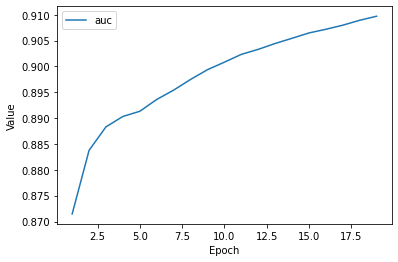

In [115]:
#AUC
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"

METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [116]:
print("\n: Evaluate the new model on the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)
#AUC:0.9059


: Evaluate the new model on the test set:
Consider rewriting this model with the Functional API.
37/37 [==============================] - 0s 2ms/step - loss: 0.2585 - auc: 0.9059


[0.2585434913635254, 0.9059262275695801]